<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Assessing Performance Lesson

_Authors: Alex Hubbard (NYC)_

---

<a id="learning-objectives"></a>
### Learning Objectives

- Describe various methods for assessing a model's performance.
- Code accuracy, precision, recall, confusion matrix, and ROC curve.
- Create data visualizations for model performance.

### Lesson Guide
- [Data Source](#data-source)
- [Methods](#methods)
- [Wall-Clock Time](#wall-clock-time)
- [Accuracy](#accuracy)
- [Precision](#precision)
- [Recall](#recall)
- [F1 Score](#f-1-score)
- [Mean Absolue Error](#mean-absolute-error)
- [Confusion Matrix](#confusion-matrix)
- [Receiver Operator Characteristic Curve (ROC Curve)](#receiver-operator-characteristic-curve)



<a id="data-source"></a>
## Data Source

Today, we’ll use:
- Advertising data (from `experiments-hypothesis-tests`)
- Movie rating data (from `exploratory-data-analysis`).

In [1]:
# Imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This allows plots to appear directly in the notebook.
%matplotlib inline
plt.style.use('fivethirtyeight') 

In [2]:
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
movies_df = pd.read_table('data/movie_ratings.tsv', sep='\t', header=None, names=rating_cols)
movies_df.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
# Read data into a DataFrame.

# We use index_col to tell Pandas that the first column in the data has row labels.
advertising_df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
advertising_df.head() 

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<a id="methods"></a>
## Methods

There are various types of way to determine how well a model is performing. Generally when someone is asking about the performance of your model they are asking about the accuracy. However, accuracy is only part of the story and can often be misleading. 

Some of the more common methods include:
- Wall-Clock Time
- Accuracy
- Precision
- Recall
- F1 Score
- Mean Absolue Error
- Confusion Matrix
- Receiver Operator Characteristic Curve (ROC Curve)


<a id="wall-clock-time"></a>
## Wall-Clock Time

Wall-Clock Time is the time it takes for a model to complete. This is also referred to as computational time. 

The less time it takes your code to complete the better. Fast run time models allows data scientist to make more iterations and improvements, as they are spending little time waiting for results.

There are two main ways of keeping the wall-clock time low:
- Efficient code
- Money

Efficient code can be achieved by reducing redudancies (i.e. keeping your code DRY – Dont Repeat Yourself), parallel processing, pipeline design, etc.

Money is a great option if it's available. Adding more CPU, RAM, etc. will certainly decrease run time. A good example of this in practice is google's search algorithm.

<a id="accuracy"></a>
## Accuracy

Accuracy is used to understand how often you model is making correct predictions. As a general rule your model should be no less than random chance – often expressed as _luck_. Random chance is calculated as 1 ÷ number of predictions (class variables). For example, when predicting coin flips the random chance varible is 50% (1 ÷ 2). By adding type of coin as a third class the luck variable goes to 33% (1 ÷ 3).

Accuracy as the only metric of performance can be dangerous. A common example is when working with unbalanced class variables. By predicting that every instance will be the more common class we are able to hack the accuracy.


**Predict 1 Star Movies**

For simplisity we'll use probability

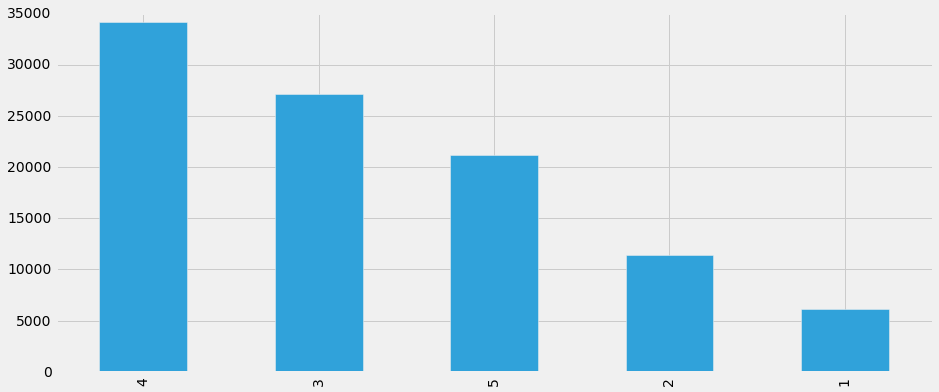

In [4]:
movies_df['rating'].value_counts().plot(kind='bar', figsize=(14, 6))

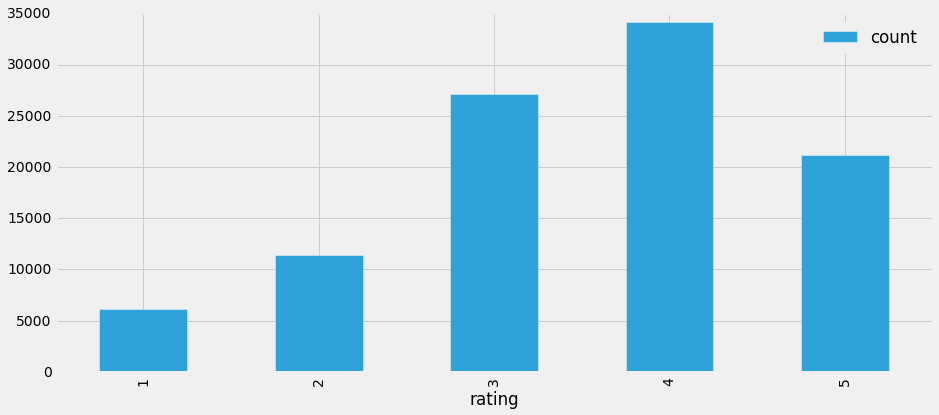

In [5]:
(movies_df
 .groupby('rating')
 .count()
 [['movie_id']]
 .rename(columns={'movie_id':'count'})
 .plot(kind='bar', figsize=(14, 6)))

In [6]:
total_1_stars = len(movies_df.loc[movies_df['rating'] == 1])
total_movies = len(movies_df)
probability_1_star = total_1_stars / total_movies
probability_not_1_star = 1 - probability_1_star

print("""
The probability that a movie is a 1 star movie is: {} ({} ÷ {})
""".format(probability_1_star, total_1_stars, total_movies))



The probability that a movie is a 1 star movie is: 0.0611 (6110 ÷ 100000)



In [7]:
## Create function to predict if 1 star
def predict_rating(probabilities=[probability_1_star, probability_not_1_star]):
    return np.random.choice(a=[True, False], p=probabilities)

predict_rating()

False

In [8]:
## For every row predict if 1 star
movies_df['prediction'] = movies_df['rating'].apply(lambda row: predict_rating())
movies_df['rating_binary'] = movies_df['rating'].apply(lambda row: row == 1)
movies_df['correct_prediction'] = movies_df['prediction'] == movies_df['rating_binary']
movies_df.head(5)

,user_id,movie_id,rating,timestamp,prediction,rating_binary,correct_prediction
0,196,242,3,881250949,False,False,True
1,186,302,3,891717742,False,False,True
2,22,377,1,878887116,False,True,False
3,244,51,2,880606923,False,False,True
4,166,346,1,886397596,False,True,False


What is the overall accuracy?
==

In [9]:
correct = movies_df.loc[movies_df['correct_prediction'] == True]
accuracy = len(correct) / len(movies_df)

print("""
Accuracy: {} ({} ÷ {})
""".format(accuracy, len(correct), len(movies_df)))


Accuracy: 0.88487 (88487 ÷ 100000)



What is the accuracy for predicting 1 star movies?
==

In [10]:
movies_subset = movies_df.loc[movies_df['rating'] == 1]
correct = movies_subset.loc[movies_subset['correct_prediction'] == True]
accuracy = len(correct) / len(movies_subset)

print("""
Accuracy: {} ({} ÷ {})
""".format(accuracy, len(correct), len(movies_subset)))


Accuracy: 0.0600654664484 (367 ÷ 6110)



What is the accuracy for predicting NOT 1 star movies?
==

In [11]:
movies_subset = movies_df.loc[movies_df['rating'] > 1]
correct = movies_subset.loc[movies_subset['correct_prediction'] == True]
accuracy = len(correct) / len(movies_subset)

print("""
Accuracy: {} ({} ÷ {})
""".format(accuracy, len(correct), len(movies_subset)))


Accuracy: 0.938545105975 (88120 ÷ 93890)



<a id="precision"></a>
## Precision

_Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives... Precision is also referred to as positive predictive value (PPV)_.

Precision helps us understand good our model is at predicting a particular class. Precision is good at calculating how accurate one type of your predictions are.

![Precision](assets/precision.png)

What is the precision for predicting 1 star movies?
==

In [90]:
movies_subset = movies_df.loc[movies_df['prediction'] == True]
true_positives = movies_subset.loc[movies_subset['correct_prediction'] == True]
precision = len(true_positives) / len(movies_subset)


print("""
Precision: {} ({} ÷ {})
""".format(precision, len(true_positives), len(movies_subset)))


Precision: 0.0628899835796 (383 ÷ 6090)



What is the precision for every movie rating?
==

Use the same methodology as predicting 1 star movies. This will require using numpy's random choice.

In [12]:
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
movies_df = pd.read_table('data/movie_ratings.tsv', sep='\t', header=None, names=rating_cols)

total_1_stars = len(movies_df.loc[movies_df['rating'] == 1])
total_2_stars = len(movies_df.loc[movies_df['rating'] == 2])
total_3_stars = len(movies_df.loc[movies_df['rating'] == 3])
total_4_stars = len(movies_df.loc[movies_df['rating'] == 4])
total_5_stars = len(movies_df.loc[movies_df['rating'] == 5])

probability_1_star = total_1_stars / total_movies
probability_2_star = total_2_stars / total_movies
probability_3_star = total_3_stars / total_movies
probability_4_star = total_4_stars / total_movies
probability_5_star = total_5_stars / total_movies

probabilities = [
    probability_1_star,
    probability_2_star,
    probability_3_star,
    probability_4_star,
    probability_5_star,
]

## Create function to predict if 1 star
def predict_rating(probabilities=probabilities):
    return np.random.choice(a=[1, 2, 3, 4, 5], p=probabilities)

## For every row predicting rating
movies_df['prediction'] = movies_df['rating'].apply(lambda row: predict_rating())
movies_df['correct_prediction'] = movies_df['prediction'] == movies_df['rating']

movies_df.head(5)

,user_id,movie_id,rating,timestamp,prediction,correct_prediction
0,196,242,3,881250949,3,True
1,186,302,3,891717742,4,False
2,22,377,1,878887116,5,False
3,244,51,2,880606923,5,False
4,166,346,1,886397596,4,False


In [13]:
for i in range(1, 6):
    movies_subset = movies_df.loc[movies_df['prediction'] == i]
    true_positives = movies_subset.loc[movies_subset['correct_prediction'] == True]
    precision = len(true_positives) / len(movies_subset)


    print("""
    Predicting {} Rating
    Precision: {} ({} ÷ {})
    """.format(i, precision, len(true_positives), len(movies_subset)))


    Predicting 1 Rating
    Precision: 0.0590180195074 (357 ÷ 6049)
    

    Predicting 2 Rating
    Precision: 0.116347177849 (1311 ÷ 11268)
    

    Predicting 3 Rating
    Precision: 0.274557992811 (7485 ÷ 27262)
    

    Predicting 4 Rating
    Precision: 0.337753555607 (11589 ÷ 34312)
    

    Predicting 5 Rating
    Precision: 0.211568525274 (4466 ÷ 21109)
    


<a id="recall"></a>
## Recall

_Precision is defined as the number of true positives divided by the number of true positives plus the number of false negatives... Recall is also referred to as the true positive rate or sensitivity._

Recall differs from precision because it asks how correct our predictions were compared to the true answer. Precision, on the other hand, asks how correct our predictions were which class we predicted them as.

Recall is good at calculating how accurate your model is at identifying a particular class from the total class population.

![Recall](assets/recall.png)

What is the recall for every movie rating?
==

Use the dataframe constructed from the section on precision.

In [14]:
for i in range(1, 6):
    movies_subset = movies_df.loc[movies_df['rating'] == i]
    true_positives = movies_subset.loc[movies_subset['correct_prediction'] == True]
    recall = len(true_positives) / len(movies_subset)


    print("""
    Rating Class {}
    Recall: {} ({} ÷ {})
    """.format(i, recall, len(true_positives), len(movies_subset)))


    Rating Class 1
    Recall: 0.0584288052373 (357 ÷ 6110)
    

    Rating Class 2
    Recall: 0.115303430079 (1311 ÷ 11370)
    

    Rating Class 3
    Recall: 0.275741388838 (7485 ÷ 27145)
    

    Rating Class 4
    Recall: 0.339117457716 (11589 ÷ 34174)
    

    Rating Class 5
    Recall: 0.210650441017 (4466 ÷ 21201)
    


What is the recall for predicting a moving to have more than 3 stars?
==

Use the same methodology as predicting 1 star movies. This will require using numpy's random choice.

In [15]:
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
movies_df = pd.read_table('data/movie_ratings.tsv', sep='\t', header=None, names=rating_cols)

total_3_and_below = len(movies_df.loc[movies_df['rating'] < 4])
total_4_and_above = len(movies_df.loc[movies_df['rating'] > 3])

probability_3_and_below = total_3_and_below / total_movies
probability_4_and_above = total_4_and_above / total_movies

probabilities = [
    probability_3_and_below,
    probability_4_and_above,
]

## Create function to predict if 1 star
def predict_rating(probabilities=probabilities):
    return np.random.choice(a=[False, True], p=probabilities)

## For every row predicting rating
movies_df['prediction'] = movies_df['rating'].apply(lambda row: predict_rating())
movies_df['rating_binary'] = movies_df['rating'].apply(lambda row: row > 3)
movies_df['correct_prediction'] = movies_df['prediction'] == movies_df['rating_binary']

movies_df.head(5)

,user_id,movie_id,rating,timestamp,prediction,rating_binary,correct_prediction
0,196,242,3,881250949,True,False,False
1,186,302,3,891717742,False,False,True
2,22,377,1,878887116,False,False,True
3,244,51,2,880606923,True,False,False
4,166,346,1,886397596,False,False,True


In [16]:
## Get Recall
movies_subset = movies_df.loc[movies_df['rating_binary'] == True]
true_positives = movies_subset.loc[movies_subset['correct_prediction'] == True]
recall = len(true_positives) / len(movies_subset)

print("""
Preciting 4 or 5 star movies
Recall: {} ({} ÷ {})
""".format(recall, len(true_positives), len(movies_subset)))


Preciting 4 or 5 star movies
Recall: 0.550826185102 (30502 ÷ 55375)



<a id="f-1-score"></a>
## F1 Score
_The F1 score conveys the balance between the precision and the recall._

Also known as the F Score and F Measure. The F1 Score is a great way to capture both precision and recall as a single number.

F1 Scores are difficult to explain to non-techinical audiences. Often times presenting the Precision and Recall as separate metrics is the better option.

![Recall](assets/f_score.jpg)

What is the F1 Score for predicting a moving to have more than 3 stars?
==

Use the dataframe constructed from the section on recall.

In [105]:
## Get Recall
movies_subset = movies_df.loc[movies_df['rating_binary'] == True]
true_positives = movies_subset.loc[movies_subset['correct_prediction'] == True]
recall = len(true_positives) / len(movies_subset)

## Get Precision
movies_subset = movies_df.loc[movies_df['prediction'] == True]
true_positives = movies_subset.loc[movies_subset['correct_prediction'] == True]
precision = len(true_positives) / len(movies_subset)

## Get F1 Score
f_score = 2 / ((1/recall) + (1/precision))
print("""
First F1 Score is: {}
""".format(f_score))

## Get F1 Score
f_score = 2 * ((precision * recall) / (precision + recall))
print("""
Second F1 Score is: {}
""".format(f_score))


First F1 Score is: 0.551565694025


Second F1 Score is: 0.551565694025



Using Scikit-learn
==

Scikit-learn is a popular library for data science. It is highly advised to use pre-made methods, as it will save time and ensure accuracy. That being said, it's good to write the code yourself at least once to get an idea of how it works.

We will now use sklearn's `precision_recall_fscore_support` to calcuate precision, recall, and f1 scores.
Documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)

In [108]:
## may need to pip install
from sklearn.metrics import precision_recall_fscore_support
movies_df.head(5)

,user_id,movie_id,rating,timestamp,prediction,rating_binary,correct_prediction
0,196,242,3,881250949,False,False,True
1,186,302,3,891717742,False,False,True
2,22,377,1,878887116,True,False,False
3,244,51,2,880606923,True,False,False
4,166,346,1,886397596,True,False,False


In [124]:
y_true = movies_df['rating_binary']
y_pred = movies_df['prediction']
precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_pred)

print precision, recall, fscore

[ 0.44474195  0.55252523] [ 0.44665546  0.55060948] [ 0.44569665  0.55156569]


<a id="confusion-matrix"></a>
## Confusion Matrix

_A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing._ 

A confusion matrix is dense with information and can be hard to interpret for even the most seasoned data scientist.

![Confusion Matrix](assets/confusion_matrix.png)

Use Scikit-Learn to Construct a Confusion Matrix
==

Create a confusion matrix to determine the models performance for predicting a moving to have more than 3 stars.

Use sklearn's `confusion_matrix`. Documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [146]:
from sklearn.metrics import confusion_matrix
movies_df.tail(5)

,user_id,movie_id,rating,timestamp,prediction,rating_binary,correct_prediction
99995,880,476,3,880175444,True,False,False
99996,716,204,5,879795543,True,True,True
99997,276,1090,1,874795795,True,False,False
99998,13,225,2,882399156,True,False,False
99999,12,203,3,879959583,True,False,False


In [126]:
y_true = movies_df['rating_binary']
y_pred = movies_df['prediction']
confusion_matrix(y_true, y_pred)

array([[19932, 24693],
       [24885, 30490]])

Use Scikit-Learn to Graph a Confusion Matrix
==

Visualize a confusion matrix to determine the models performance for predicting a moving to have more than 3 stars.

Use sklearn's `confusion_matrix`. Documentation can be found [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

In [163]:
## may need to pip install itertools
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="grey" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.grid()

Confusion matrix, without normalization
[[19932 24693]
 [24885 30490]]


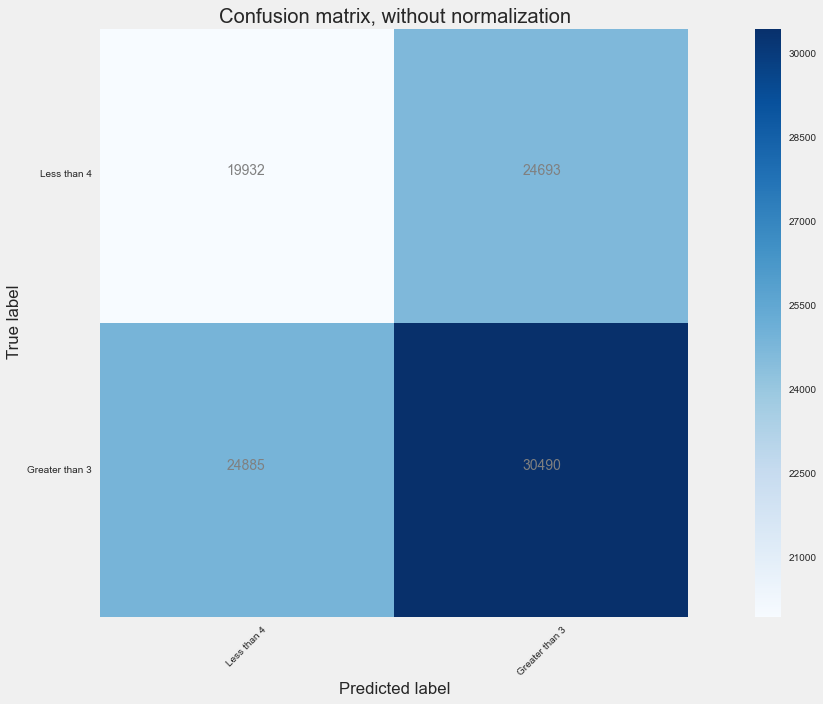

In [164]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
class_names = ['Less than 4', 'Greater than 3']

plt.figure(figsize=(18, 10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 0.44665546  0.55334454]
 [ 0.44939052  0.55060948]]


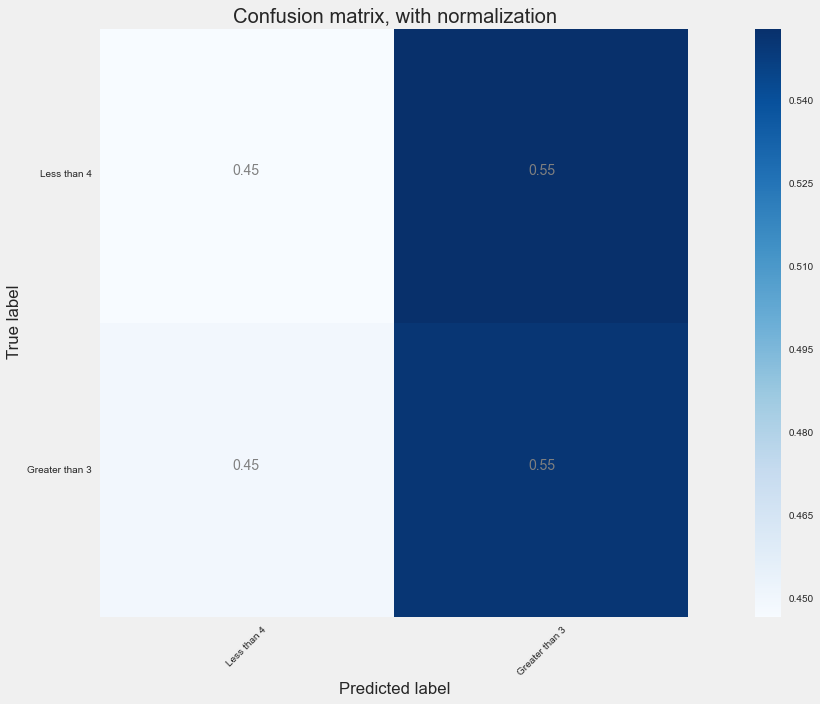

In [165]:
# Compute confusion matrix with normalization
cnf_matrix = confusion_matrix(y_true, y_pred)
class_names = ['Less than 4', 'Greater than 3']

plt.figure(figsize=(18, 10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      normalize=True,
                      title='Confusion matrix, with normalization')

<a id="mean-absolute-error"></a>
## Mean Absolue Error

_The mean absolute error is a measure of difference between two continuous variables._ 

![mae](assets/mae.png) 

----

Mean Absolue Error (MAE) is a method to tell determine how "close" our predictions are on average. Low MAE means that our predictions are, on average, close to the true values. MAE scores will suffer when variance is high. This is equvalent to the mean being susceptible to outliers. 

![mae scatter](assets/mae_scatter_plot.png)

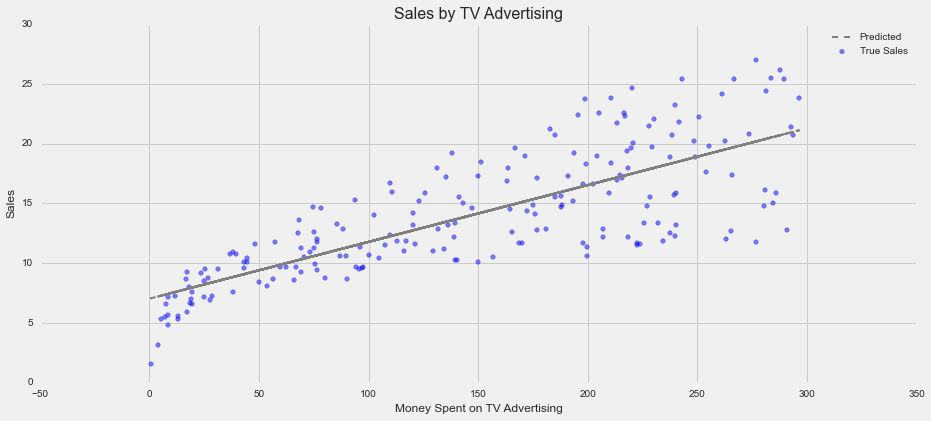

In [203]:
## may need to pip install scipy
from scipy import stats

## Look at data
fig, ax = plt.subplots(figsize=(14,6))
font_size = 12

## Plot sales by TV Spend
y = advertising_df['sales']
x = advertising_df['TV']
ax.scatter(x, y, alpha=.5, color='blue', label='True Sales')

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
ax.plot(x, line, color='grey', label='Predicted', linestyle='dashed', linewidth=2)


ax.legend()
ax.set_title('Sales by TV Advertising', fontsize=font_size+4)
ax.set_ylabel('Sales', fontsize=font_size)

ax.set_xlabel('Money Spent on TV Advertising', fontsize=font_size);

In [204]:
## Load
advertising_df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

## Use regression to prediction sales
slope, intercept, r_value, p_value, std_err = stats.linregress(x=advertising_df['TV'], y=advertising_df['sales'])
advertising_df['sales_prediction'] = slope*x+intercept

## View data
advertising_df.tail(5)

,TV,radio,newspaper,sales,sales_prediction
196,38.2,3.7,13.8,7.6,8.848493
197,94.2,4.9,8.1,9.7,11.510545
198,177.0,9.3,6.4,12.8,15.446579
199,283.6,42.0,66.2,25.5,20.513985
200,232.1,8.6,8.7,13.4,18.065848


In [207]:
## Calclate absolute value of distance from predition
advertising_df['distance'] = abs(advertising_df['sales'] - advertising_df['sales_prediction'])
advertising_df.tail(5)

,TV,radio,newspaper,sales,sales_prediction,distance
196,38.2,3.7,13.8,7.6,8.848493,1.248493
197,94.2,4.9,8.1,9.7,11.510545,1.810545
198,177.0,9.3,6.4,12.8,15.446579,2.646579
199,283.6,42.0,66.2,25.5,20.513985,4.986015
200,232.1,8.6,8.7,13.4,18.065848,4.665848


In [209]:
## Calulate MAE
distance_sum = advertising_df['distance'].sum()
mae = (1/len(advertising_df)) * distance_sum

print(mae)

2.54980603893


Use Scikit-Learn
==

Doumentation found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

In [211]:
from sklearn.metrics import mean_absolute_error
y_true, y_pred = advertising_df['sales'], advertising_df['sales_prediction']
mean_absolute_error(y_true, y_pred)

2.5498060389274859

<a id="receiver-operator-characteristic-curve"></a>
## Receiver Operator Characteristic Curve (ROC Curve)

_A receiver operating characteristic curve, i.e., ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate against the false positive rate at various threshold settings._

To measure teh performance from an ROC Curve we calculate the Area Under the Curve (AUC), or Area of the Curve (AOC).


![roc_curve.png](assets/roc_curve.png)

---

Often overlooked, the ROC Curve is similar to a hypothesis test becuase it is measureing the difference between distributions. 

![roc_distribution.png](assets/roc_distribution.png)


---

ROC Curve also utilize the same principles we learned from precision, recall, and the confusion matrix. An ROC Curve attemps to find the optimal spot the separtes the distributions, while balancing the True Positive Rate (TRP) and False Positive Rate (FPR).

![ROC_distribution_confusion.png](assets/ROC_distribution_confusion.png)

---

ROC Curve are best used on binary classifiers, but with some work can be used to calculate performance on 3 or more classifiers. ROC Curves iterate through all operating points to determine the best point that splits the distributions, and therefore work best with continous values, such as probabilities.

In [243]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
import statsmodels.api as sm

def auc_mwu(df_results):
    pos = df_results.loc[df_results['label'] == 1, 'prob_renew']
    neg = df_results.loc[df_results['label'] == 0, 'prob_renew']
    U = stats.mannwhitneyu(pos,neg).statistic
    auc_ = U / (len(pos) * len(neg))
    if auc_ < .5:
        auc_ = 1 - auc_
    return auc_

def simulate_auc(mew_1=50, mew_2=50, std_1=10, std_2=10, plot=False):
    distribution_test = pd.DataFrame()

    #### Full overlap knn auc test
    ## make data
    d1 = np.random.normal(mew_1, std_1, 1000)
    d2 = np.random.normal(mew_2, std_2, 1000)

    d1_df = pd.DataFrame(d1, columns=['data'])
    d1_df['data_2'] = d1
    d1_df['class'] = 0
    d2_df = pd.DataFrame(d2, columns=['data'])
    d2_df['data_2'] = d2
    d2_df['class'] = 1

    ## split data
    both_df = d1_df.append(d2_df).reset_index(drop=True)
    trainX, testX, trainy, testy = train_test_split(both_df[['data', 'data_2']], both_df['class'], test_size=0.8, random_state=2)

    # fit a model
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(trainX, trainy)

    # predict probabilities
    probs = model.predict_proba(testX)
    probs = probs[:, 1]


    # calculate AUC
    auc_ = round(roc_auc_score(testy, probs), 6)


    ## calc AUC from u-test
    prediction = pd.DataFrame(probs, columns=['prob_renew'])
    prediction['label'] = list(testy)
    mw_auc = round(auc_mwu(prediction), 6)

    distribution_test.loc[0, 'mean_1'] = mew_1
    distribution_test.loc[0, 'mean_2'] = mew_2
    distribution_test.loc[0, 'standard_deviation_1'] = std_1
    distribution_test.loc[0, 'standard_deviation_2'] = std_2
    distribution_test.loc[0, 'roc_auc'] = auc_
    distribution_test.loc[0, 'u_statistic_auc'] = mw_auc
    distribution_test['auc_agreement'] = distribution_test['roc_auc'] == distribution_test['u_statistic_auc']

    if plot == True:
        font=16
        lw = 2
        fig = plt.figure(figsize=(18,10))
        ax = fig.add_subplot(111)
        colors = ['red', 'green']
        classes = [0, 1]
        for i in range(2):
            class_ = classes[i]
            color = colors[i]

            # Estimate the densities
            x = both_df.loc[both_df['class'] == class_, 'data']
            kde = sm.nonparametric.KDEUnivariate(x)
            kde.fit()
            # Plot the KDE as fitted using the default arguments
            ax.plot(kde.support, kde.density, lw=3, label='Distribution for Class {}'.format(i), zorder=10, color=color)
        ax.set_title('Distributions of Diff Classes', fontsize=font)
        ax.legend(bbox_to_anchor=(-.05, 1))
        ax.set_ylabel('Density', fontsize=font)
        ax.grid(True, zorder=-5)

        plt.show();
        
        
        ## plot ROC
        font=16
        lw = 2
        fig = plt.figure(figsize=(18,10))
        ax = fig.add_subplot(111)

        roc_df = pd.DataFrame()
        fpr, tpr, thresholds = roc_curve(testy, probs, pos_label=1)
        roc_auc = auc(fpr, tpr)

        ax.plot(fpr, tpr, lw=1, label='ROC(area = {})'.format(round(roc_auc, 2)))

        plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--', label='Luck')
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate', fontsize=font)
        plt.ylabel('True Positive Rate', fontsize=font)
        plt.title('Receiver operating characteristic', fontsize=font+2)
        # plt.legend(bbox_to_anchor=(-0.1, 1),fontsize=font)
        ax.legend(loc='lower right')
        ax.annotate('AUC {}'.format(round(roc_auc, 2)), xy=(.6, .2), xytext=(.6, .2), fontsize=font)
        plt.grid()
        plt.show();

    return distribution_test

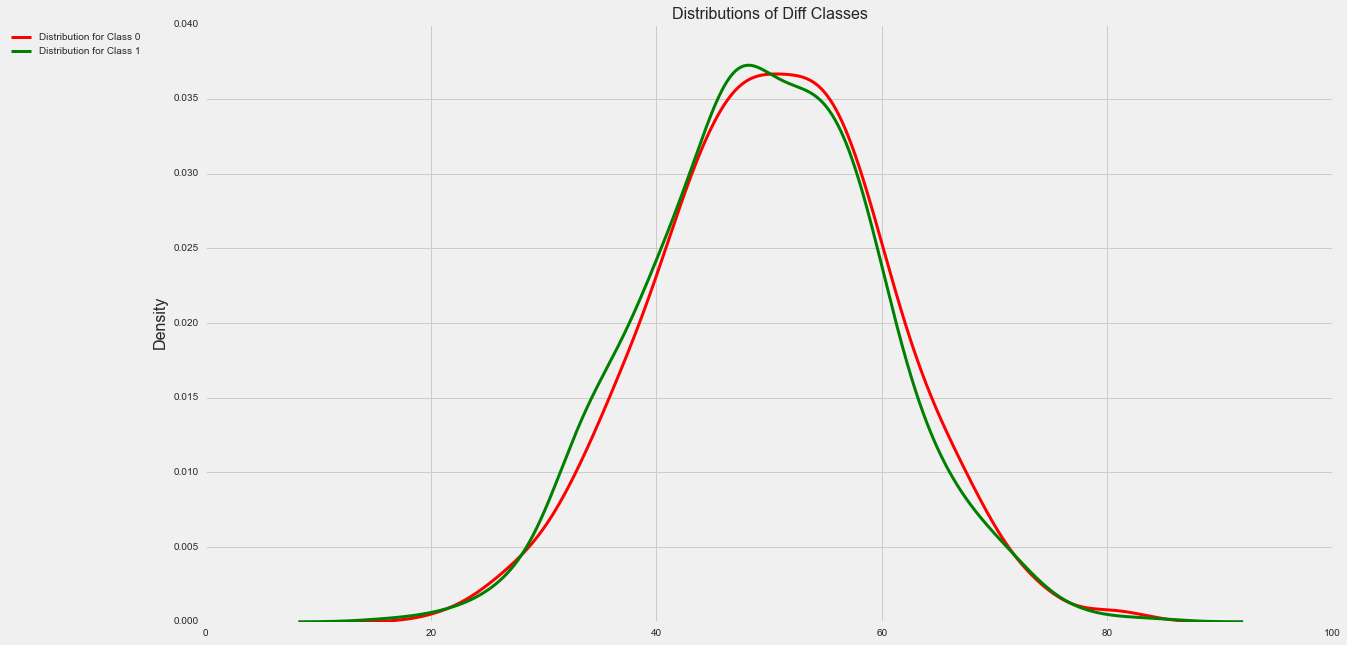

,mean_1,mean_2,standard_deviation_1,standard_deviation_2,roc_auc,u_statistic_auc,auc_agreement
0,50.0,50.0,10.0,10.0,0.508515,0.508515,True


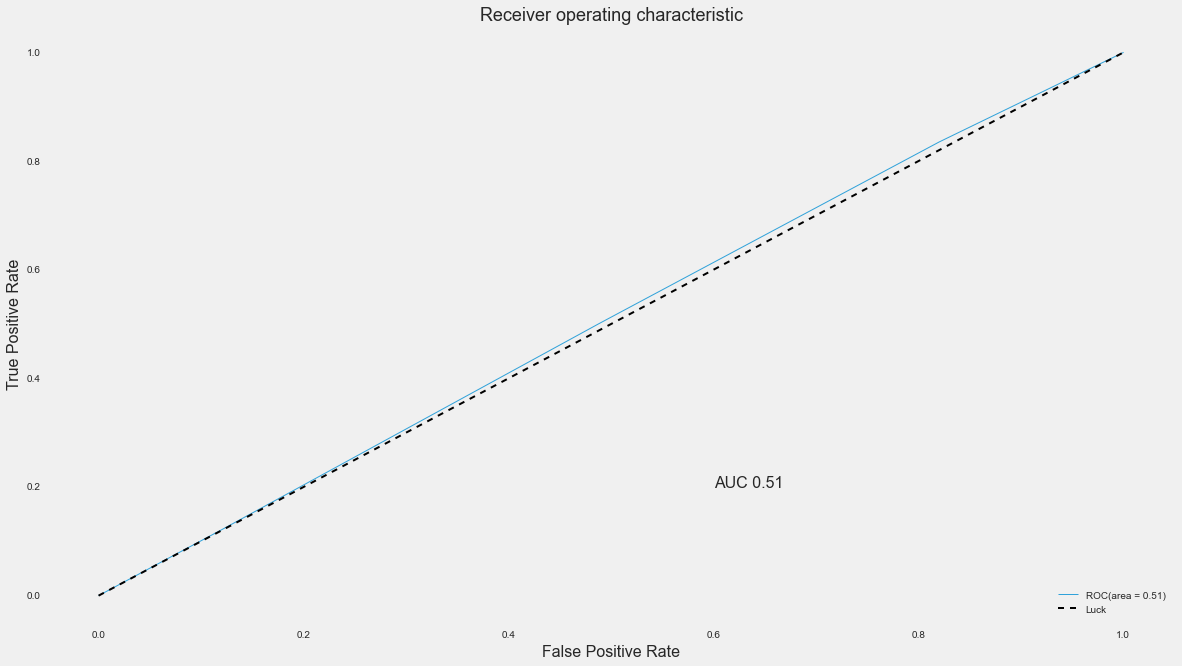

In [246]:
simulate_auc(mew_1=50, mew_2=50, std_1=10, std_2=10, plot=True)

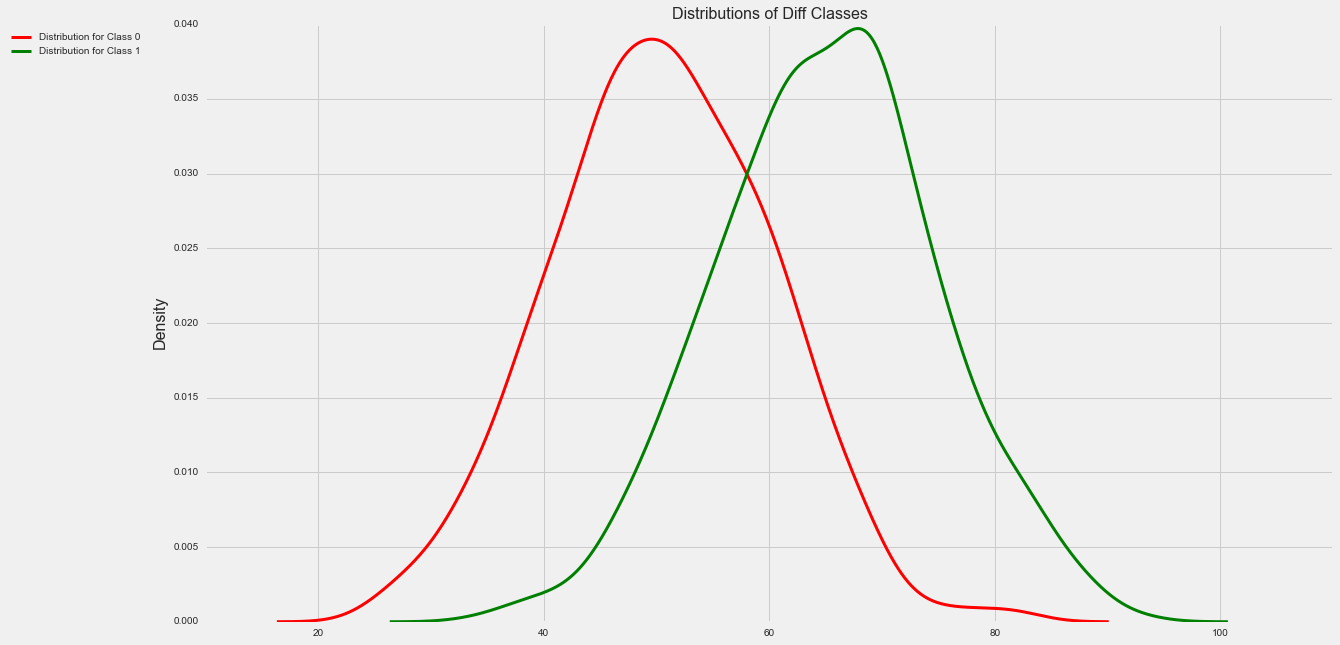

,mean_1,mean_2,standard_deviation_1,standard_deviation_2,roc_auc,u_statistic_auc,auc_agreement
0,50.0,65.0,10.0,10.0,0.773853,0.773853,True


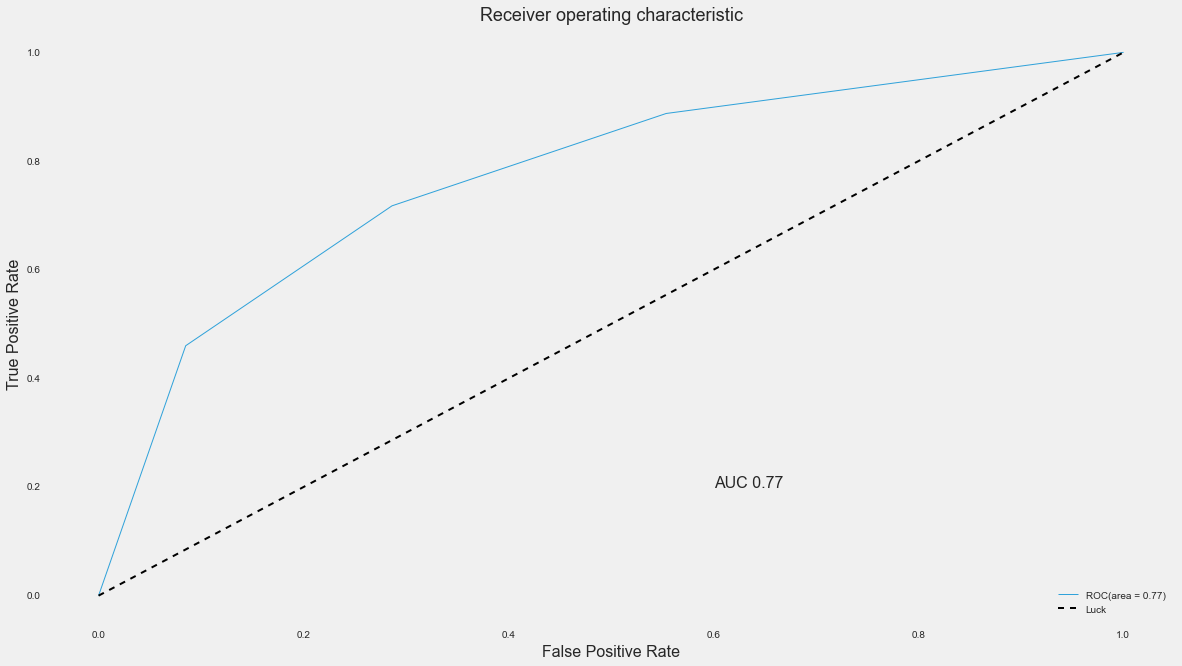

In [247]:
simulate_auc(mew_1=50, mew_2=65, std_1=10, std_2=10, plot=True)

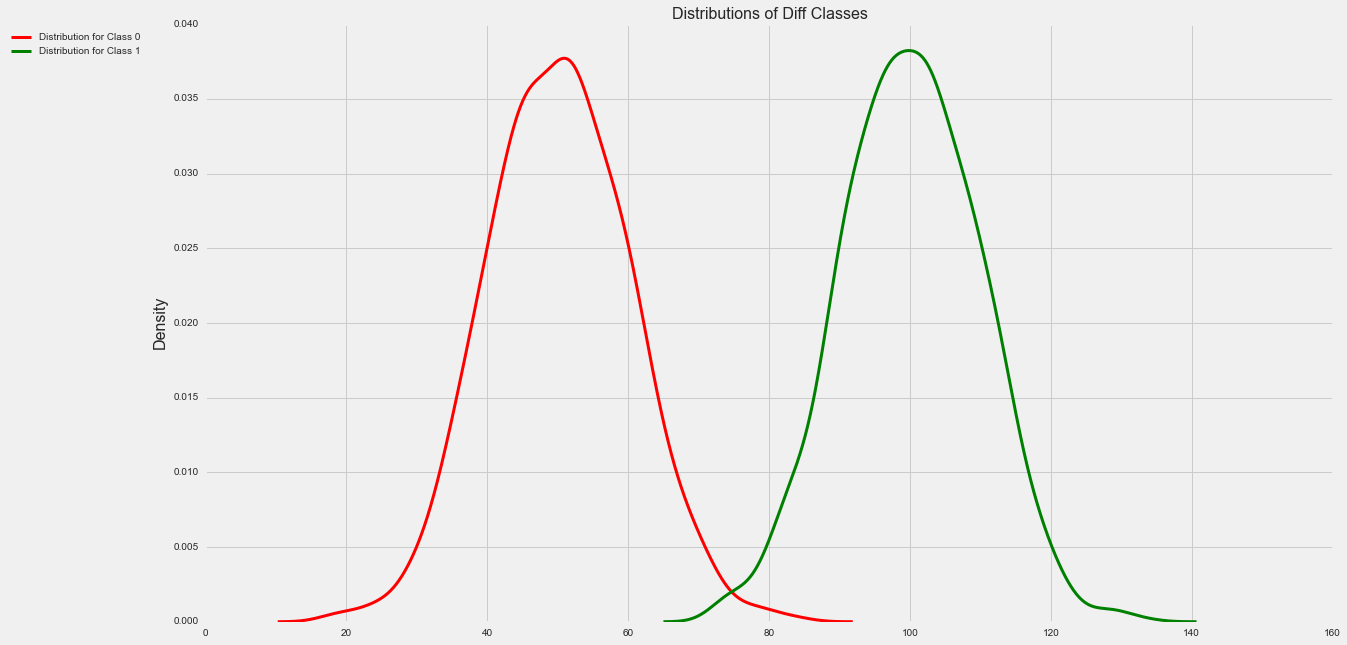

,mean_1,mean_2,standard_deviation_1,standard_deviation_2,roc_auc,u_statistic_auc,auc_agreement
0,50.0,100.0,10.0,10.0,0.998588,0.998588,True


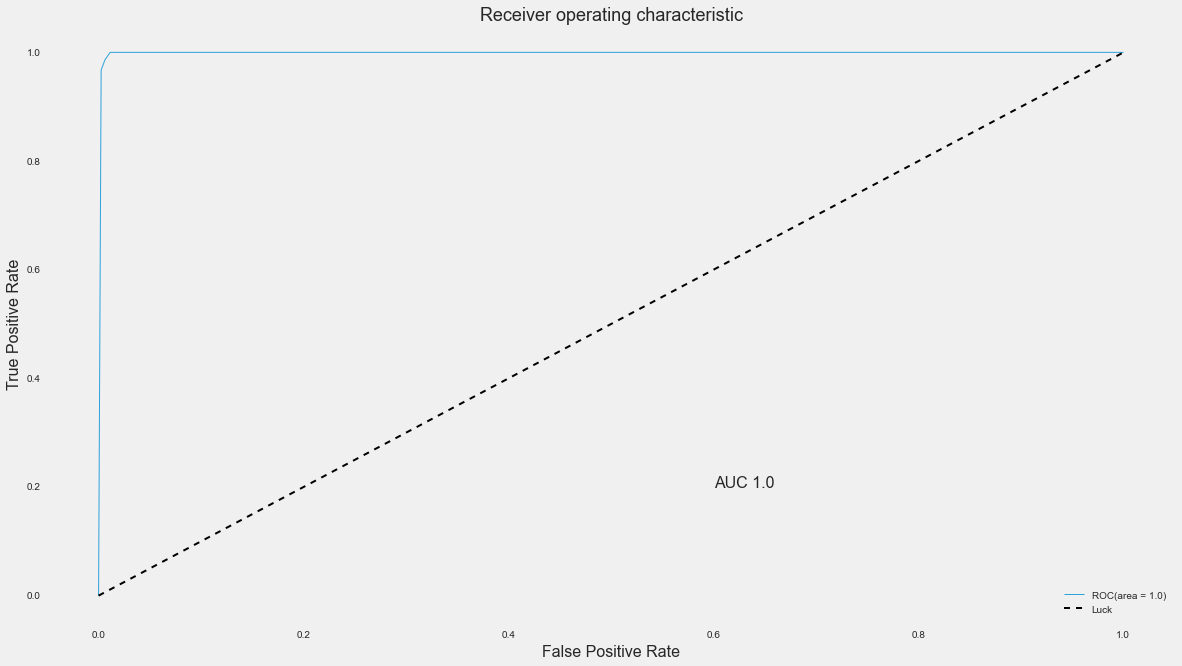

In [248]:
simulate_auc(mew_1=50, mew_2=100, std_1=10, std_2=10, plot=True)

Lesson Review
==

- We covered several different ways to calcualte performance.
- Accuracy alone does not tell the whole story.
- Pick how to present results based on audience, as well as model type.
- ROC Curves are similar to hypothesis testing.
